## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

## Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv('/content/flo_data_20k.csv')

Dataset

In [4]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


Feature names

In [5]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

Descriptive statistics

In [6]:
summary = df.describe().T
print(summary)

                                     count        mean         std    min  \
order_num_total_ever_online        19945.0    3.110855    4.225647   1.00   
order_num_total_ever_offline       19945.0    1.913913    2.062880   1.00   
customer_value_total_ever_offline  19945.0  253.922597  301.532853  10.00   
customer_value_total_ever_online   19945.0  497.321690  832.601886  12.99   

                                      25%     50%     75%       max  
order_num_total_ever_online          1.00    2.00    4.00    200.00  
order_num_total_ever_offline         1.00    1.00    2.00    109.00  
customer_value_total_ever_offline   99.99  179.98  319.97  18119.14  
customer_value_total_ever_online   149.98  286.46  578.44  45220.13  


Null values

In [7]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

Data types analysis

In [8]:
data_types = df.dtypes

print("Data types:\n", data_types)

Data types:
 master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object


In [9]:
# Selecting categorical variables
categorical_columns = df.select_dtypes(include=['object'])

# Selecting numeric variables
numeric_columns = df.select_dtypes(include=['int', 'float'])

print("categorical variables:\n", categorical_columns)
print("numeric variables:\n", numeric_columns)

categorical variables:
                                   master_id order_channel last_order_channel  \
0      cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1      f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2      69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App   
3      1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App   
4      d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop   
...                                     ...           ...                ...   
19940  727e2b6e-ddd4-11e9-a848-000d3a38a36f   Android App            Offline   
19941  25cd53d4-61bf-11ea-8dd8-000d3a38a36f       Desktop            Desktop   
19942  8aea4c2a-d6fc-11e9-93bc-000d3a38a36f       Ios App            Ios App   
19943  e50bb46c-ff30-11e9-a5e8-000d3a38a36f   Android App        Android App   
19944  740998d2-b1f7-11e9-89fa-000d3a38a36f   Android App        Android App   

      first_ord

In [10]:
# With special statistics for categorical variables
categorical_summary = df[categorical_columns.columns].describe()

# With special statistics for numeric variables
numeric_summary = df[numeric_columns.columns].describe()

print("Categorical variable Statistics:\n", categorical_summary)
print("Numeric variable Statistics:\n", numeric_summary)

Categorical variable Statistics:
                                    master_id order_channel last_order_channel  \
count                                  19945         19945              19945   
unique                                 19945             4                  5   
top     cc294636-19f0-11eb-8d74-000d3a38a36f   Android App        Android App   
freq                                       1          9495               6783   

       first_order_date last_order_date last_order_date_online  \
count             19945           19945                  19945   
unique             2465             366                   1743   
top          2019-02-16      2021-05-19             2020-11-27   
freq                 80             205                    200   

       last_order_date_offline interested_in_categories_12  
count                    19945                       19945  
unique                     738                          32  
top                 2021-05-19                

## Feature Engineering

In [11]:
df['average_purchase_value_online'] = df['customer_value_total_ever_online'] / df['order_num_total_ever_online']
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,average_purchase_value_online
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],199.845000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",97.556842
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",131.783333
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",81.980000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],159.990000


New features

In [12]:
df['average_purchase_value_offline'] = df['customer_value_total_ever_offline'] / df['order_num_total_ever_offline']
df['customer_value_total_ever_mix'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']
df['order_num_total_ever_mix'] = df['order_num_total_ever_offline'] + df['order_num_total_ever_online']
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,average_purchase_value_online,average_purchase_value_offline,customer_value_total_ever_mix,order_num_total_ever_mix
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],199.845000,139.990,939.37,5.0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",97.556842,79.985,2013.55,21.0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",131.783333,94.985,585.32,5.0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",81.980000,39.990,121.97,2.0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],159.990000,49.990,209.98,2.0


Date type change

In [13]:
date_columns = ['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline']
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,average_purchase_value_online,average_purchase_value_offline,customer_value_total_ever_mix,order_num_total_ever_mix
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],199.845000,139.990,939.37,5.0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",97.556842,79.985,2013.55,21.0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",131.783333,94.985,585.32,5.0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",81.980000,39.990,121.97,2.0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],159.990000,49.990,209.98,2.0


The distribution of the number of customers, total purchased quantity of products, and total expenditures across shopping channels.


In [14]:
df.groupby('order_channel').agg(total_number_of_customers = ('master_id','count'), total_number_of_customer_value = ('customer_value_total_ever_mix', 'sum'), total_number_of_orders = ('order_num_total_ever_mix', 'sum'))

,total_number_of_customers,total_number_of_customer_value,total_number_of_orders
order_channel,,,
Android App,9495,7819062.76,52269.0
Desktop,2735,1610321.46,10920.0
Ios App,2833,2525999.93,15351.0
Mobile,4882,3028183.16,21679.0


Top 10 customers with the highest profits

In [15]:
df.sort_values(by='customer_value_total_ever_mix', ascending= False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,average_purchase_value_online,average_purchase_value_offline,customer_value_total_ever_mix,order_num_total_ever_mix
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",226.100650,342.485000,45905.10,202.0
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.0,1.0,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",547.579104,130.490000,36818.29,68.0
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",403.140000,1263.760000,33918.10,82.0
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.0,1.0,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",3068.847000,538.940000,31227.41,11.0
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.0,3.0,18119.14,2587.20,[AKTIFSPOR],2587.200000,6039.713333,20706.34,4.0
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",266.665000,210.920000,18443.57,70.0
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",244.001304,82.480000,16918.57,70.0
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.0,1.0,180.73,12545.37,"[ERKEK, AKTIFSPOR]",348.482500,180.730000,12726.10,37.0
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",94.094231,49.990000,12282.24,131.0
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.0,2.0,64.97,12038.18,"[ERKEK, KADIN]",668.787778,32.485000,12103.15,20.0


Top 10 customers who order the most

In [16]:
df.sort_values(by='order_num_total_ever_mix', ascending= False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,average_purchase_value_online,average_purchase_value_offline,customer_value_total_ever_mix,order_num_total_ever_mix
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",226.100650,342.485000,45905.10,202.0
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",94.094231,49.990000,12282.24,131.0
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.0,109.0,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",71.990000,93.940000,10383.44,111.0
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.0,87.0,8432.25,139.98,[ERKEK],139.980000,96.922414,8572.23,88.0
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.0,81.0,3997.55,242.81,[ERKEK],121.405000,49.352469,4240.36,83.0
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",403.140000,1263.760000,33918.10,82.0
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.0,74.0,4640.77,543.28,"[KADIN, AKTIFSPOR]",181.093333,62.713108,5184.05,77.0
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.0,3.0,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",69.513194,97.643333,5297.88,75.0
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",244.001304,82.480000,16918.57,70.0
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",266.665000,210.920000,18443.57,70.0


## Calculating RFM Metrics

In [17]:
df.sort_values(by='last_order_date', ascending= False).head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,average_purchase_value_online,average_purchase_value_offline,customer_value_total_ever_mix,order_num_total_ever_mix
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,Android App,Android App,2019-12-27,2021-05-30,2021-05-30,2019-12-27,15.0,1.0,229.98,9723.33,"[AKTIFCOCUK, KADIN, AKTIFSPOR]",648.222000,229.980,9953.31,16.0
19111,3991df04-d707-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-12,2021-05-30,2021-05-30,2021-04-26,1.0,2.0,319.97,319.99,[AKTIFSPOR],319.990000,159.985,639.96,3.0
18383,a0288834-5bf1-11ea-9714-000d3a38a36f,Mobile,Mobile,2019-12-27,2021-05-30,2021-05-30,2019-12-27,3.0,1.0,112.99,620.97,[],206.990000,112.990,733.96,4.0
15885,73dbc3ba-1f72-11ea-87bf-000d3a38a36f,Android App,Android App,2019-09-29,2021-05-30,2021-05-30,2019-09-29,1.0,1.0,79.99,215.92,[],215.920000,79.990,295.91,2.0
3333,4ca1591c-a6b5-11e9-a2fc-000d3a38a36f,Desktop,Desktop,2014-11-14,2021-05-30,2021-05-30,2019-03-14,13.0,1.0,89.99,1668.72,"[COCUK, AKTIFSPOR]",128.363077,89.990,1758.71,14.0


In [18]:
today_date = datetime(2021, 6, 1) #I set the analysis date to this date as if it were so, in order to prevent the values from becoming too large.
today_date

datetime.datetime(2021, 6, 1, 0, 0)

In [19]:
rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm['recency'] = today_date - df['last_order_date']
rfm['recency'] = rfm['recency'].dt.days
rfm['frequency'] = df['order_num_total_ever_mix']
rfm['monetary'] = df['customer_value_total_ever_mix']
rfm.head()

,customer_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98


In [20]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945.0,134.458360,103.281149,2.00,43.00,111.00,202.00,367.0
frequency,19945.0,5.024768,4.742707,2.00,3.00,4.00,6.00,202.0
monetary,19945.0,751.244287,895.402173,44.98,339.98,545.27,897.78,45905.1


In [21]:
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Calculating RF Score

In [22]:
rfm['RF_SCORE'] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))
rfm

,customer_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RF_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,3,4,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1,31
...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,331,3.0,401.96,1,2,3,13
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,161,2.0,390.47,2,2,2,22
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,8,3.0,632.94,5,3,3,53
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,108,6.0,1009.77,3,4,4,34


# Creating & Analysing RFM Segments

In [23]:
segments_names = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(segments_names, regex=True)

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RF_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4,34,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5,35,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,3,4,24,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1,31,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1,31,about_to_sleep


The recency, frequency and monetary averages of the segments

In [24]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])



recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep       113.785144  1629   2.401473  1629   359.008963  1629
at_Risk              241.606835  3131   4.472373  3131   646.610236  3131
cant_loose           235.444167  1200  10.698333  1200  1474.468217  1200
champions             17.106625  1932   8.934265  1932  1406.625109  1932
hibernating          247.949501  3604   2.394007  3604   366.267062  3604
loyal_customers       82.594763  3361   8.374591  3361  1216.818616  3361
need_attention       113.828676   823   3.727825   823   562.142965   823
new_customers         17.917647   680   2.000000   680   339.955544   680
potential_loyalists   37.155888  2938   3.304289  2938   533.184466  2938
promising             58.921175   647   2.000000   647   335.672705   647

Calculate segment numbers and percentages and visualization

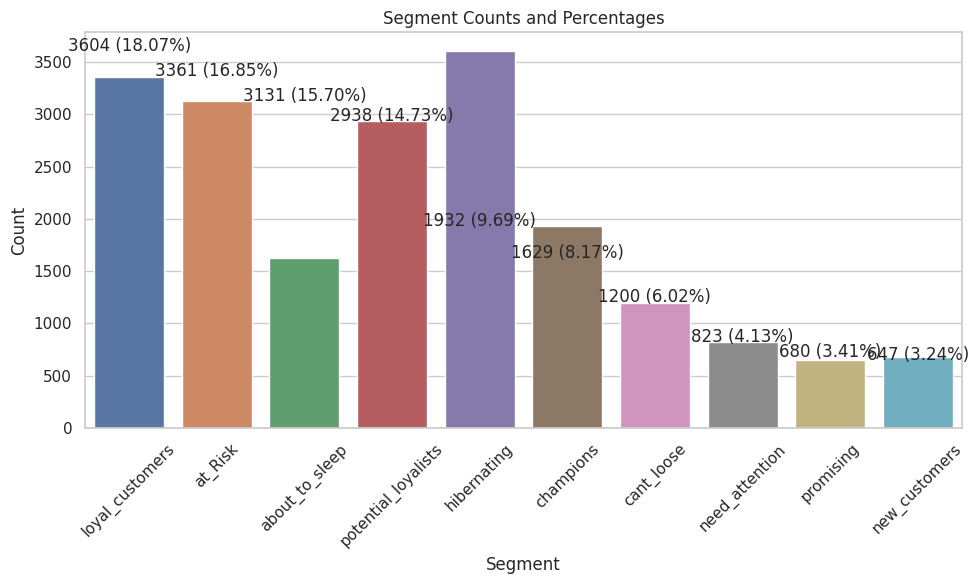

In [25]:
# Calculate segment numbers and percentages
segment_counts = rfm["segment"].value_counts()
segment_percentages = (segment_counts / segment_counts.sum()) * 100

# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, order = rfm["segment"].unique())
plt.xlabel("Segment")
plt.ylabel("Count")
plt.title("Segment Counts and Percentages")
plt.xticks(rotation=45)
for i, count in enumerate(segment_counts):
    plt.text(i, count + 1, f"{count} ({segment_percentages[i]:.2f}%)", ha='center')
plt.tight_layout()
plt.show()

## Example Business Cases

**Case 1:** "FLO" is incorporating a new women's shoe brand into its portfolio. The product prices of this included brand are above the preferences of the general customer base. Therefore, there is an intention to establish personalized communication with customers of the profile that will be involved in promoting the brand and driving product sales. This communication will specifically target loyal customers (champions, loyal_customers) and individuals who make purchases from the women's category. The ID numbers of these customers will be recorded in a CSV file.

In [26]:
rfm[rfm['segment'] == "champions"]["customer_id"]

11       c2e15af2-9eed-11e9-9897-000d3a38a36f
14       241f0ad0-afb5-11e9-9757-000d3a38a36f
60       07ddfcfe-2590-11ea-b1c8-000d3a38a36f
65       83c57128-1eea-11ea-81ff-000d3a38a36f
73       eb648a26-a56e-11e9-a2fc-000d3a38a36f
                         ...                 
19904    ec37afac-52e6-11ea-9ade-000d3a38a36f
19905    281dca02-a2ba-11e9-a2fc-000d3a38a36f
19913    81d0da04-a53e-11e9-a2fc-000d3a38a36f
19917    f8c471c8-2596-11eb-81e9-000d3a38a36f
19926    7e1c15be-6298-11ea-9861-000d3a38a36f
Name: customer_id, Length: 1932, dtype: object

In [27]:
rfm_copy_for_analysis = rfm
rfm_copy_for_analysis['interested_in_categories_12'] = df['interested_in_categories_12']

In [28]:
target_customer_ids = rfm_copy_for_analysis[(rfm_copy_for_analysis['segment'].isin(["champions", "loyal_customers"])) & (rfm_copy_for_analysis['interested_in_categories_12'].str.contains('KADIN'))]["customer_id"]

In [29]:
Target_Customer_IDs = pd.DataFrame()
Target_Customer_IDs['customer_id'] = target_customer_ids
Target_Customer_IDs.head()

,customer_id
0,cc294636-19f0-11eb-8d74-000d3a38a36f
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11,c2e15af2-9eed-11e9-9897-000d3a38a36f
33,fb840306-1219-11ea-a001-000d3a38a36f


In [30]:
Target_Customer_IDs.to_csv("Target_Customer_IDs.csv")

**Case 2:** Nearly 40% discount is planned for Men's and Children's products. It is aimed to specifically target customers who are good customers in the past, but who have not shopped for a long time, who are interested in the categories related to this discount, who should not be lost, those who are asleep and new customers. Save the IDs of the customers in the appropriate profile to the csv file.

In [31]:
#hibernating, new_customers, cant_loose

In [32]:
df['interested_in_categories_12'].unique()

array(['[KADIN]', '[ERKEK, COCUK, KADIN, AKTIFSPOR]', '[ERKEK, KADIN]',
       '[AKTIFCOCUK, COCUK]', '[AKTIFSPOR]', '[COCUK]',
       '[ERKEK, COCUK, KADIN]', '[KADIN, AKTIFSPOR]',
       '[AKTIFCOCUK, COCUK, KADIN]', '[COCUK, KADIN, AKTIFSPOR]',
       '[ERKEK, AKTIFSPOR]', '[AKTIFCOCUK, COCUK, AKTIFSPOR]', '[ERKEK]',
       '[COCUK, KADIN]', '[ERKEK, KADIN, AKTIFSPOR]', '[AKTIFCOCUK]',
       '[COCUK, AKTIFSPOR]', '[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]',
       '[ERKEK, COCUK]', '[]', '[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]',
       '[AKTIFCOCUK, ERKEK, COCUK]', '[AKTIFCOCUK, ERKEK]',
       '[AKTIFCOCUK, KADIN]',
       '[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]',
       '[AKTIFCOCUK, ERKEK, COCUK, KADIN]', '[AKTIFCOCUK, AKTIFSPOR]',
       '[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]',
       '[AKTIFCOCUK, KADIN, AKTIFSPOR]', '[AKTIFCOCUK, ERKEK, AKTIFSPOR]',
       '[ERKEK, COCUK, AKTIFSPOR]', '[AKTIFCOCUK, ERKEK, KADIN]'],
      dtype=object)

In [36]:
target_customer_ids = rfm_copy_for_analysis[(rfm_copy_for_analysis['segment'].isin(["hibernating","new_customers", "cant_loose"])) & (rfm_copy_for_analysis['interested_in_categories_12'].str.contains('ERKEK|COCUK'))]["customer_id"]

In [39]:
Target_Customer_IDs = pd.DataFrame()
Target_Customer_IDs['customer_id'] = target_customer_ids
Target_Customer_IDs.head()

,customer_id
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f
10,ae608ece-c9d8-11ea-a31e-000d3a38a36f
15,13ed97a4-b167-11e9-89fa-000d3a38a36f
19,2730793e-3908-11ea-85d6-000d3a38a36f
21,7b289956-d691-11e9-93bc-000d3a38a36f


In [40]:
Target_Customer_IDs.to_csv("Case2_Target_Customer_IDs.csv")